# Day 5 Lunch Assignment
## Principle Component Analysis on SNP Data
------------------------------------

# Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data and wrangle
- Calculate the total num of smaples (our population)
- Make a total count for each SNP
- Caculate and store alternate allele frequency for each gene

In [2]:
df = pd.read_csv("matrix_1kg.txt", delimiter='\t')
num_pop = len(df.loc[:, 'HG00096':].columns)
print(num_pop)

df['total'] = df.loc[:, 'HG00096':].sum(axis=1)
df

2548


,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,total
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,98
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,147


In [3]:
df['alt_allele_freq'] = df['total'] / (2 * num_pop)
df

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,total,alt_allele_freq
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.000392
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,98,0.019231
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0.003336
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0.002159
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.000392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,105,0.020604
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000196
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0.001374
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,147,0.028846


# Plot allele frequency spectrum

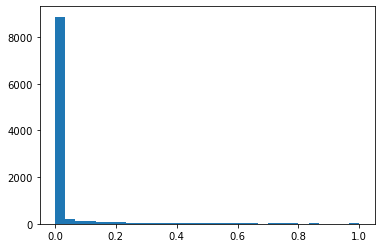

In [4]:
fig, ax = plt.subplots()
ax.hist(df['alt_allele_freq'], bins=30)
plt.show()

# Subset data that we want to use for PCA

In [5]:
condn = (df['alt_allele_freq'] >= 0.05) & (df['alt_allele_freq'] <= 0.95)

df_common = df[condn]
pca_input = df_common.iloc[:, 4:-2].T
pca_input

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


# PCA analysis
- Standardize data
- Perform PCA fit
- Check for correct shape (should be 2548 rows)

In [6]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)

In [7]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output.shape

(2548, 10)

In [8]:
col_names = []
for i in range(10):
    to_add = 'PC' + str(i+1)
    col_names.append(to_add)
    
pca_output_df = pd.DataFrame(data=pca_output,
                             columns=col_names)
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546329,-5.395415,-0.503512,-0.314622,0.606396,-0.233647,-5.098907,1.498662
1,-6.133884,-8.631829,2.557123,-3.896202,0.306678,-2.157972,1.325070,5.533754,-0.563066,-1.410476
2,-6.238473,-7.971870,-0.745600,-4.014319,-0.936727,3.934999,0.028007,-1.951258,1.036177,0.947529
3,-5.051218,-7.008727,2.804817,-4.761121,4.379747,0.290277,-0.126455,-2.133403,1.258928,1.240483
4,-6.634383,-8.543670,3.071990,-1.594146,-4.368608,0.704215,1.596457,-3.503728,0.706633,-0.648193
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665560,3.299053,-0.189825,-0.807467,-3.336720,0.707618,-0.495929,-0.787470
2544,-6.295888,-3.116491,-5.555672,3.336922,3.334809,3.529594,-0.876974,-3.615366,-0.801913,-2.369887
2545,-4.096947,-2.827361,-4.180254,3.693882,1.548669,0.536695,-1.602867,-1.232402,3.989016,-0.963348
2546,-6.263462,-2.585080,-4.226329,3.891648,-3.935220,-1.826085,-0.094207,-0.705850,1.557516,-1.157851


# Plot first two axes

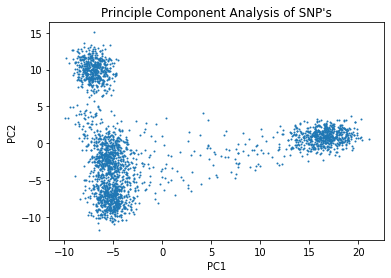

In [9]:
fig, ax = plt.subplots()
ax.scatter(x=pca_output_df['PC1'], y=pca_output_df['PC2'], s=1)
ax.set_title("Principle Component Analysis of SNP's")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

# Advanced exercises
----------------------------

# Get metadata and merge with PCA input based on 'sample' id

In [10]:
pca_output_df['sample'] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-6.144930,-9.818567,-1.546329,-5.395415,-0.503512,-0.314622,0.606396,-0.233647,-5.098907,1.498662,HG00096
1,-6.133884,-8.631829,2.557123,-3.896202,0.306678,-2.157972,1.325070,5.533754,-0.563066,-1.410476,HG00097
2,-6.238473,-7.971870,-0.745600,-4.014319,-0.936727,3.934999,0.028007,-1.951258,1.036177,0.947529,HG00099
3,-5.051218,-7.008727,2.804817,-4.761121,4.379747,0.290277,-0.126455,-2.133403,1.258928,1.240483,HG00100
4,-6.634383,-8.543670,3.071990,-1.594146,-4.368608,0.704215,1.596457,-3.503728,0.706633,-0.648193,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665560,3.299053,-0.189825,-0.807467,-3.336720,0.707618,-0.495929,-0.787470,NA21137
2544,-6.295888,-3.116491,-5.555672,3.336922,3.334809,3.529594,-0.876974,-3.615366,-0.801913,-2.369887,NA21141
2545,-4.096947,-2.827361,-4.180254,3.693882,1.548669,0.536695,-1.602867,-1.232402,3.989016,-0.963348,NA21142
2546,-6.263462,-2.585080,-4.226329,3.891648,-3.935220,-1.826085,-0.094207,-0.705850,1.557516,-1.157851,NA21143


In [11]:
df_meta = pd.read_csv('ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/integrated_call_samples_v3.20130502.ALL.panel',
                      sep='\t')
df_meta = df_meta.iloc[:, :4]
df_meta

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [12]:
pca_output_df = pd.merge(pca_output_df, df_meta, on = "sample")
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample,pop,super_pop,gender
0,-6.144930,-9.818567,-1.546329,-5.395415,-0.503512,-0.314622,0.606396,-0.233647,-5.098907,1.498662,HG00096,GBR,EUR,male
1,-6.133884,-8.631829,2.557123,-3.896202,0.306678,-2.157972,1.325070,5.533754,-0.563066,-1.410476,HG00097,GBR,EUR,female
2,-6.238473,-7.971870,-0.745600,-4.014319,-0.936727,3.934999,0.028007,-1.951258,1.036177,0.947529,HG00099,GBR,EUR,female
3,-5.051218,-7.008727,2.804817,-4.761121,4.379747,0.290277,-0.126455,-2.133403,1.258928,1.240483,HG00100,GBR,EUR,female
4,-6.634383,-8.543670,3.071990,-1.594146,-4.368608,0.704215,1.596457,-3.503728,0.706633,-0.648193,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-6.304582,-0.169819,-2.665560,3.299053,-0.189825,-0.807467,-3.336720,0.707618,-0.495929,-0.787470,NA21137,GIH,SAS,female
2499,-6.295888,-3.116491,-5.555672,3.336922,3.334809,3.529594,-0.876974,-3.615366,-0.801913,-2.369887,NA21141,GIH,SAS,female
2500,-4.096947,-2.827361,-4.180254,3.693882,1.548669,0.536695,-1.602867,-1.232402,3.989016,-0.963348,NA21142,GIH,SAS,female
2501,-6.263462,-2.585080,-4.226329,3.891648,-3.935220,-1.826085,-0.094207,-0.705850,1.557516,-1.157851,NA21143,GIH,SAS,female


# Plot data with colors based on metadata

## Based on population

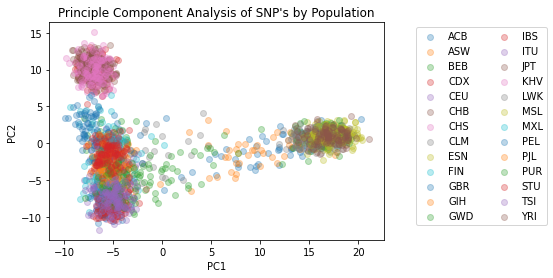

In [13]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("pop")
for name, group in tissues:
    ax.scatter(x=group['PC1'], y=group['PC2'], alpha=0.3, label=name)

    
ax.set_title("Principle Component Analysis of SNP's by Population")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")    
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', ncol=2)
plt.show()

## Based on superpopulation

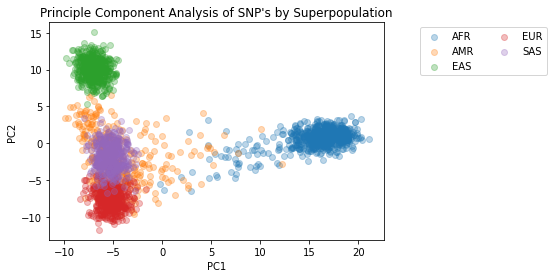

In [14]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("super_pop")
for name, group in tissues:
    ax.scatter(x=group['PC1'], y=group['PC2'], alpha=0.3, label=name)

ax.set_title("Principle Component Analysis of SNP's by Superpopulation")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")    
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', ncol=2)
plt.show()

## Based on gender

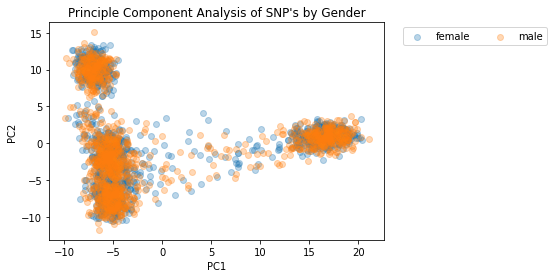

In [15]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("gender")
for name, group in tissues:
    ax.scatter(x=group['PC1'], y=group['PC2'], alpha=0.3, label=name)

ax.set_title("Principle Component Analysis of SNP's by Gender")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")    
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', ncol=2)
plt.show()

# 3D plots!!!

## All together

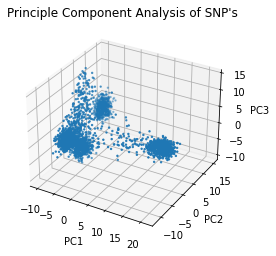

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_output_df['PC1'], ys=pca_output_df['PC2'], zs=pca_output_df['PC3'], s=2)

ax.set_title("Principle Component Analysis of SNP's")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## Based on population

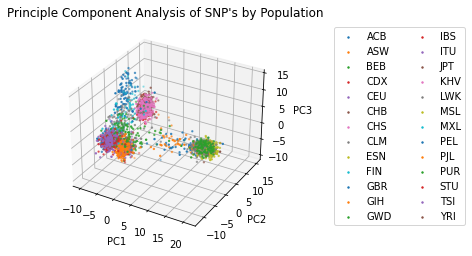

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tissues = pca_output_df.groupby("pop")

for name, group in tissues:
    ax.scatter(xs=group['PC1'], ys=group['PC2'], zs=group['PC3'], s=2, label=name)
    
ax.set_title("Principle Component Analysis of SNP's by Population")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(bbox_to_anchor=(1.9, 1), loc='upper right', ncol=2)
plt.show()

## Based on super population

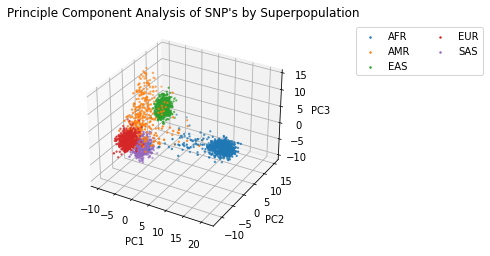

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tissues = pca_output_df.groupby("super_pop")

for name, group in tissues:
    ax.scatter(xs=group['PC1'], ys=group['PC2'], zs=group['PC3'], s=2, label=name)
    
ax.set_title("Principle Component Analysis of SNP's by Superpopulation")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(bbox_to_anchor=(1.9, 1), loc='upper right', ncol=2)
plt.show()

## Based on gender

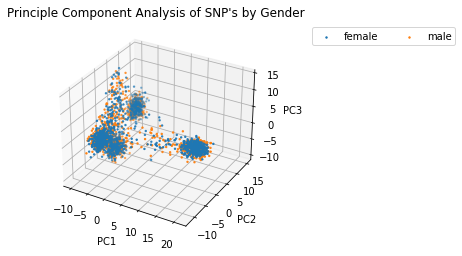

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tissues = pca_output_df.groupby("gender")

for name, group in tissues:
    ax.scatter(xs=group['PC1'], ys=group['PC2'], zs=group['PC3'], s=2, label=name)
    
ax.set_title("Principle Component Analysis of SNP's by Gender")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(bbox_to_anchor=(1.9, 1), loc='upper right', ncol=2)
plt.show()